Most Earthquake occurances in longitude/latitudes and the countries.

Importing the data and libraries:

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the earthquake dataset from Kaggle
eq_df = pd.read_csv("earthquake.csv")
ll_df = pd.read_csv("country-latitude.csv")


Preparing the earthquake dataframe:

In [273]:
eq_df.Latitude = pd.to_numeric(eq_df["Latitude"], errors="coerce")
eq_df.Longitude = pd.to_numeric(eq_df["Longitude"], errors="coerce")

eq_df = eq_df.dropna(subset=["Latitude", "Longitude"])



Preparing countries data:

In [274]:
ll_df.latitude = pd.to_numeric(ll_df.latitude, errors="coerce")
ll_df.longitude = pd.to_numeric(ll_df.longitude, errors="coerce")

# drop nulls in country, latitude, longitude columns
ll_df = ll_df.dropna(subset=["country","latitude", "longitude"])
ll_df



,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


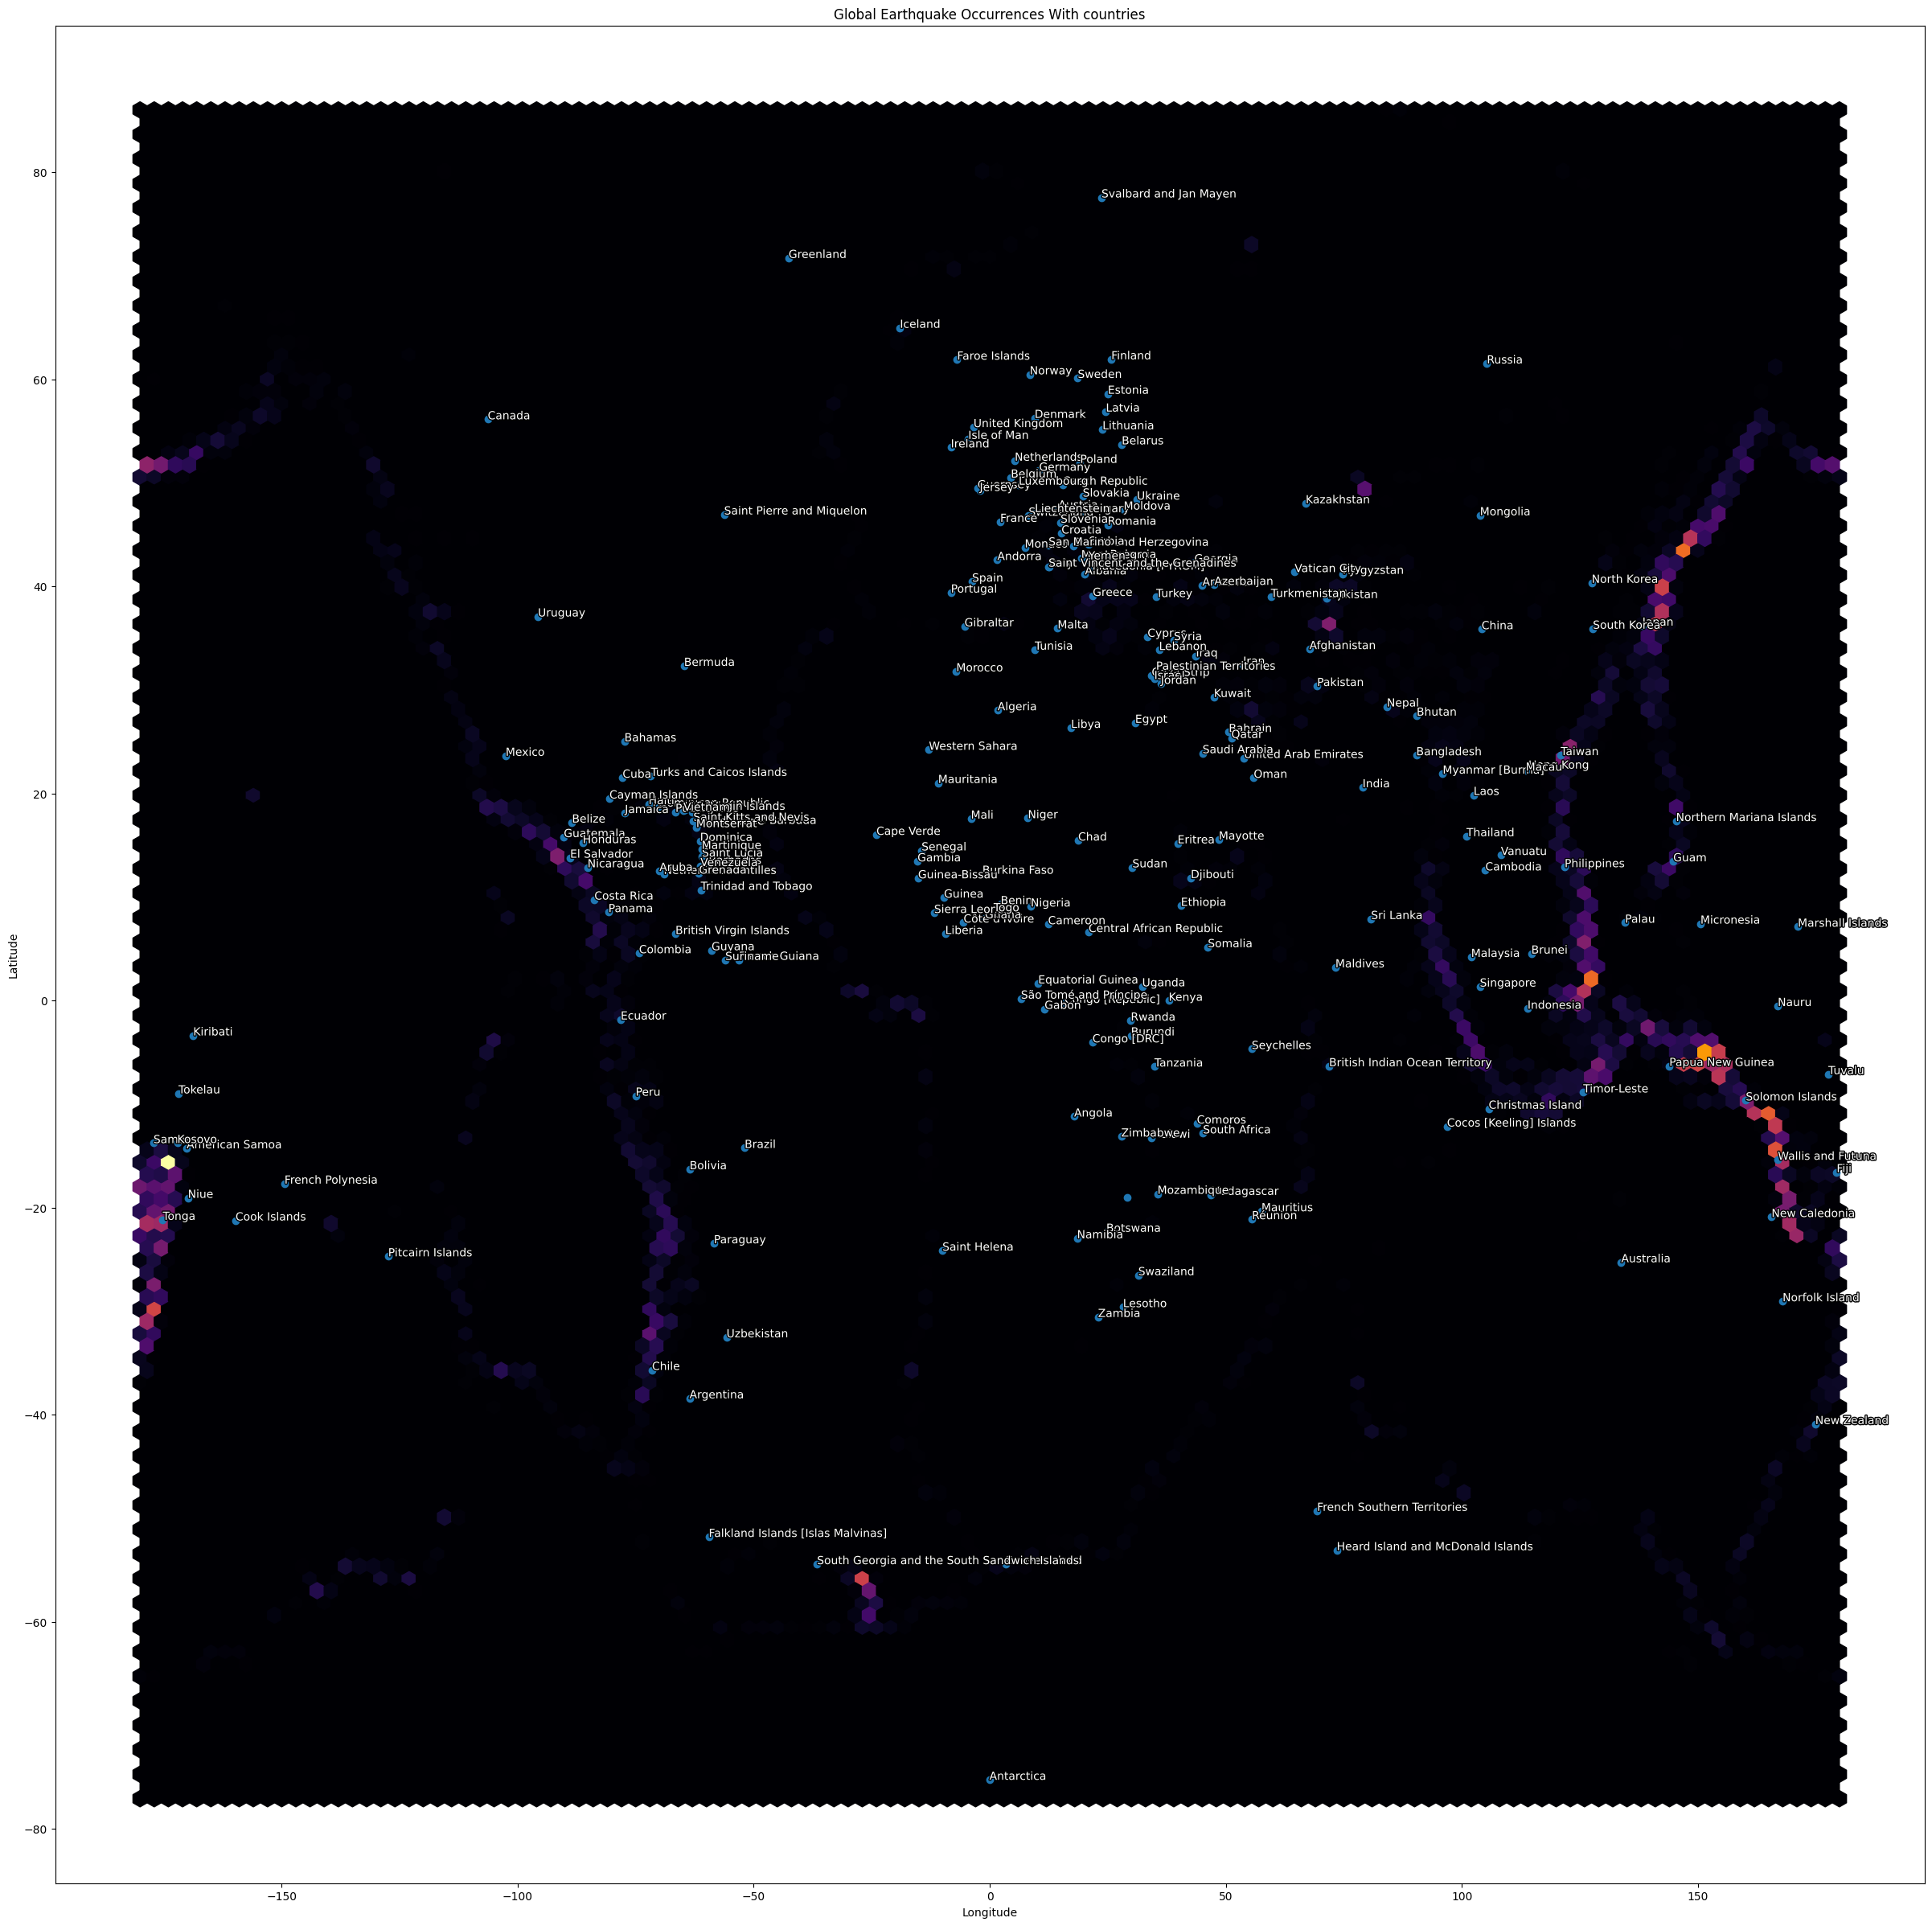

In [275]:
import matplotlib.patheffects as path_effects
plt.figure(figsize=(30, 30))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global Earthquake Occurrences With countries")
# viridis, plasma, inferno, magma, cividis
plt.hexbin(eq_df.Longitude, eq_df.Latitude, gridsize=120, cmap="inferno")

plt.scatter(ll_df.longitude, ll_df.latitude)

for i,country in enumerate(ll_df.country):
  try:
    text = plt.annotate(country, (ll_df.longitude[i], ll_df.latitude[i]))
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
    text.set_color("white")
  except KeyError:
    pass

plt.show()